# About
This time I decided to follow a completely differnt approach than in the last Tabular Playground Competitions: Use Auto ML Tools.

I will NOT do EDA. 

I will NOT learn anything about the data. 

I will just throw it into an Auto ML Tool and observe the result. In this notebook, it's **Pycaret**.

(Somehow I already feel bad... I love EDA... but hey, I think it's time to try out something new this time)

.................

**Update**: in Version 9 I started to play with pycarets preprocessing pipeline to see if I can improve the score. Additionally I included a voting regressor that averages the predictions of 3 models

In [1]:
pip install pycaret --quiet

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scattertext 0.1.3 requires gensim>=4.0.0, but you have gensim 3.8.3 which is incompatible.
pdpbox 0.2.1 requires matplotlib==3.1.1, but you have matplotlib 3.4.2 which is incompatible.
matrixprofile 1.1.10 requires protobuf==3.11.2, but you have protobuf 3.17.3 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [2]:
# import packages
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import pycaret
from pycaret.regression import *
print('PyCaret: %s' % pycaret.__version__)

import matplotlib
import matplotlib.pyplot as plt
print('Matplotlib: {}'.format(matplotlib.__version__))

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

PyCaret: 2.3.3
Matplotlib: 3.4.2
/kaggle/input/tabular-playground-series-aug-2021/sample_submission.csv
/kaggle/input/tabular-playground-series-aug-2021/train.csv
/kaggle/input/tabular-playground-series-aug-2021/test.csv


In [3]:
# read in competition data
df_train = pd.read_csv('../input/tabular-playground-series-aug-2021/train.csv')
df_test = pd.read_csv('../input/tabular-playground-series-aug-2021/test.csv')
sample_submission = pd.read_csv('../input/tabular-playground-series-aug-2021/sample_submission.csv')

I checked quickly the data types and that there are no missing values. Nothing more. Now let's throw the data into pycaret.

In [4]:
# create experiment to setup pycaret environment and define pre-processing pipeline
# set silent=True only after you checked the data types! this removes the user prompt and allows to run "save & run all", i.e store the notebook output
pc_experiment = setup(data=df_train, target=df_train.columns[-1], 
                      normalize = True, transformation = True, 
                      silent= True, log_experiment=True, experiment_name="TPS8_normalize")

,Description,Value
0,session_id,6885
1,Target,loss
2,Original Data,"(250000, 102)"
3,Missing Values,False
4,Numeric Features,101
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(174999, 100)"


The data has been split into Transformed Train Set and Transformed Test Set. The split was done with the default of 70/30. The Transformed Test Set (30%) is the validation set (holdout set) that is used later to assess model performance. It's important to note that the validation set is not used for cross validation. Cross validation is done on the Transformed Training Set (70%) ([see here](https://github.com/pycaret/pycaret/blob/master/tutorials/Regression%20Tutorial%20Level%20Beginner%20-%20REG101.ipynb)). Pycaret will use 10-fold cross validation.

We can see here that Pycaret did not create any additional features (like it would e.g. do when one hot encoding categorical features): The Transformed Train Set and the Transformed Test Set have still 100 features. 

In [5]:
# let's see which models are available for regression in Pycaret
#models()

In [6]:
# let's have a look at the normalized and transformed data
get_config('X_train')

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f90,f91,f92,f93,f94,f95,f96,f97,f98,f99
199421,0.196538,0.260435,0.992263,-1.594930,-0.747222,1.226620,1.328781,0.289393,-0.112844,-2.201153,...,-1.167255,-0.885578,0.568712,1.382319,2.683805,-1.079772,0.125371,1.045307,-0.973235,-0.614207
129052,-1.387327,1.562836,0.405782,-1.161889,-0.582587,0.807380,-1.205956,-1.177149,-0.190342,-1.852898,...,1.106368,-0.580044,0.213423,1.573769,0.441741,-0.578252,0.869002,-1.879820,0.058655,1.699830
168049,-1.329434,-1.085586,-0.584332,0.672525,-0.440090,0.636068,0.304633,0.296703,-0.430835,1.227003,...,0.737616,1.632289,-0.277080,-0.543323,-1.012138,-3.141837,-0.150860,-0.123024,2.689996,1.014476
183944,0.422558,-1.223499,-0.533790,1.087252,0.243432,0.429591,-0.922639,0.788213,-0.270364,-0.643034,...,-1.412163,-0.531396,-0.513994,0.605318,0.455686,-0.170521,0.035620,0.242572,-0.334116,0.485799
112211,-0.912409,0.176582,0.266320,-1.008355,0.041912,-0.729931,-0.859615,0.268957,-0.056874,-0.182207,...,-0.210592,-0.338466,-1.171276,-2.526180,0.977985,-0.117158,0.388857,1.645372,1.087962,-1.033121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157204,-0.683012,1.155328,-0.171431,-0.146599,-0.934828,0.571981,-0.563998,-0.576809,0.277491,1.064829,...,1.235523,1.726302,2.619578,-0.123979,-0.617602,-0.133984,0.961392,0.366308,0.454875,0.562417
21361,-0.532272,-1.131091,-0.786971,-1.131364,-0.977963,0.426276,0.547474,-2.828871,0.497206,-0.106116,...,0.223322,0.128344,-0.668386,1.787355,-0.996550,-0.072502,1.427507,-0.500433,-0.432813,1.032414
157881,0.151462,-1.085586,0.707990,-0.729783,-0.770901,-1.329384,-0.820950,0.764838,-0.374256,-0.166188,...,-1.717664,-0.841108,0.276472,-0.555621,-0.997780,-1.009888,-2.756883,-0.069777,-0.479422,-1.603114
66556,-0.049890,1.140696,-0.416031,-1.051348,-0.648408,0.526169,-0.140365,-0.566144,1.292328,-0.730150,...,-1.280679,-0.872795,-0.063329,-0.235409,-0.717435,1.703724,-0.059692,1.125391,0.224731,-0.083237


In [7]:
get_config('y_train')

199421     2.0
129052     0.0
168049     0.0
183944     3.0
112211     1.0
          ... 
157204     3.0
21361      5.0
157881     3.0
66556     22.0
126526     3.0
Name: loss, Length: 174999, dtype: float32

In [8]:
# compare different baseline models with 5 fold cross-validation, I ran this only once due to the execution time
#best_3_models = compare_models(fold=5, n_select=3)


# RSME with defaults
# catboost   7.8681
# lightgbm   7.8729
# gbr        7.8866
# ... lr     7.9386

# RSME with normalize=True and transform=True
# catboost   7.8569
# lightgbm   7.8619
# gbr        7.8746
# lr         7.8914

**Oberservations while waiting for pycaret to finish model evaluation:**

The first three quaters on the processing bar passed quite quickly. Then the visible progress stalled. "Estimator" is changing from time to time... so it seems to be still running.

Pycaret runs algorithms I haven't even heard of...

I have time to work out, clean and read a book while waiting.

....................................................................................Now, it's done and the winners are: **CatBoost, LightGBM and GBR**!

In [9]:
# create model - this function uses the default hyperparameters
# you actually don't need this line if you run everything in one session. best_model would already return the trained best model
# see here: https://towardsdatascience.com/5-things-you-are-doing-wrong-in-pycaret-e01981575d2a
catboost = create_model('catboost')
lightgbm =  create_model('lightgbm')
lr = create_model('lr') # use linear regression (4th place) instead of gbr (3rd place), because gbr has huge training time

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,6.1529,62.3383,7.8955,0.0123,1.2231,1.3523
1,6.1509,62.2872,7.8922,0.0106,1.2246,1.3552
2,6.1567,61.9805,7.8728,0.0090,1.2255,1.3863
3,6.2040,63.3751,7.9608,0.0091,1.2253,1.3646
4,6.1544,62.0742,7.8787,0.0090,1.2215,1.3541
5,6.1465,62.1023,7.8805,0.0099,1.2267,1.3735
6,6.1331,61.6686,7.8529,0.0129,1.2291,1.3638
7,6.1173,61.2433,7.8258,0.0108,1.2198,1.3687
8,6.2201,64.4461,8.0278,0.0106,1.2198,1.3647
9,6.0774,60.6772,7.7896,0.0110,1.2174,1.3587


In [10]:
# have a look at the used hyperparameters
print(lightgbm)
print(lr)
print(catboost) # for catboost this does not give the hyperparameteres, use the line below instead
catboost.get_all_params()

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=6885, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)


{'nan_mode': 'Min',
 'eval_metric': 'RMSE',
 'iterations': 1000,
 'sampling_frequency': 'PerTree',
 'leaf_estimation_method': 'Newton',
 'grow_policy': 'SymmetricTree',
 'penalties_coefficient': 1,
 'boosting_type': 'Plain',
 'model_shrink_mode': 'Constant',
 'feature_border_type': 'GreedyLogSum',
 'bayesian_matrix_reg': 0.10000000149011612,
 'l2_leaf_reg': 3,
 'random_strength': 1,
 'rsm': 1,
 'boost_from_average': True,
 'model_size_reg': 0.5,
 'pool_metainfo_options': {'tags': {}},
 'subsample': 0.800000011920929,
 'use_best_model': False,
 'random_seed': 6885,
 'depth': 6,
 'posterior_sampling': False,
 'border_count': 254,
 'classes_count': 0,
 'auto_class_weights': 'None',
 'sparse_features_conflict_fraction': 0,
 'leaf_estimation_backtracking': 'AnyImprovement',
 'best_model_min_trees': 1,
 'model_shrink_rate': 0,
 'min_data_in_leaf': 1,
 'loss_function': 'RMSE',
 'learning_rate': 0.09787300229072572,
 'score_function': 'Cosine',
 'task_type': 'CPU',
 'leaf_estimation_iterations

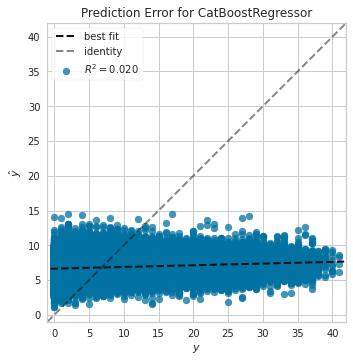

In [11]:
# compare the predictions (yhat) to the ground truth (y)
modellist = [catboost, lightgbm, lr]
# fig, ax = plt.subplots(1, 3, figsize=(20,10)) # I could not figure out how to get the three plots in one row, plot_model does not support using ax=i

plot_model(catboost, plot = 'error')

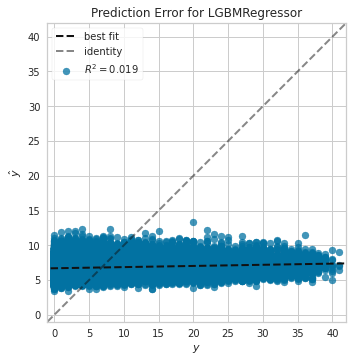

In [12]:
plot_model(lightgbm, plot = 'error')

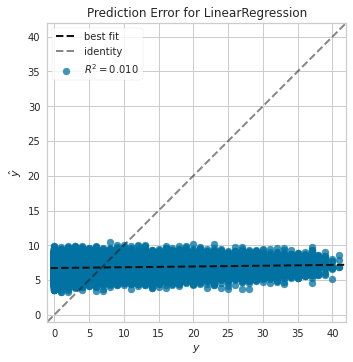

In [13]:
plot_model(lr, plot = 'error')

The models are getting more and more conservative, none of them is able to predict higher values.

In [14]:
# build voting regressor that uses the top 3 models and averages the individual predictions
# the resulting blended model can be used like any other model in pycaret
blender_top3 = blend_models(estimator_list = modellist)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,6.1220,61.7994,7.8613,0.0208,1.2163,1.3585
1,6.1173,61.6550,7.8521,0.0207,1.2179,1.3625
2,6.1237,61.3205,7.8307,0.0195,1.2181,1.3970
3,6.1719,62.8195,7.9259,0.0178,1.2186,1.3727
4,6.1182,61.4158,7.8368,0.0195,1.2145,1.3592
5,6.1135,61.5255,7.8438,0.0191,1.2196,1.3786
6,6.0977,60.9943,7.8099,0.0237,1.2214,1.3699
7,6.0809,60.6360,7.7869,0.0206,1.2123,1.3723
8,6.1853,63.7766,7.9860,0.0209,1.2124,1.3725
9,6.0409,60.0620,7.7500,0.0210,1.2102,1.3634


In [15]:
# prediction on validation/holdout set to assess model performance
holdout_predictions = predict_model(blender_top3)
holdout_predictions.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,6.1241,62.1003,7.8804,0.0209,1.2168,1.3750


,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f92,f93,f94,f95,f96,f97,f98,f99,loss,Label
0,-0.387798,-0.036901,0.388152,1.193389,1.386212,-0.040546,-1.035219,-0.416744,1.460478,0.883755,...,0.141736,-1.779960,0.574779,-1.289351,0.943866,-1.269529,-0.583962,-0.603616,4.0,7.618674
1,0.224339,-0.656365,0.475290,-0.132891,-0.699675,0.399522,-0.813024,-0.598250,0.482314,0.909932,...,-1.853876,-0.654887,-1.646500,0.453970,0.058058,-0.733640,-0.347629,0.339578,1.0,7.313364
2,1.686562,0.232999,-0.560127,-1.286855,-0.976244,0.063299,1.225450,0.184122,-0.258324,-0.163347,...,1.329324,1.816590,-0.351615,-0.510138,0.120574,1.269662,-0.263197,0.200069,8.0,9.202733
3,1.523096,-0.576213,0.225550,-0.615338,0.114461,0.137906,-1.148531,1.254046,-0.283757,-0.516962,...,-0.598606,1.080181,-1.243146,-0.038973,0.793311,-1.433437,-0.510446,-0.989132,8.0,7.082639
4,-0.227647,-0.459583,-0.123707,-1.074485,-0.671211,0.738888,-1.218544,-1.662174,0.810810,1.044282,...,0.776122,0.537510,0.544472,-0.335121,0.406029,1.426169,-0.193548,0.598250,7.0,6.627200


I am not really satisfied with the RSME of the blended model. It is worse than the RSME of catboost on the untransformed dataset (which was 7.8658). So let's see what catboost alone gets with the transformed dataset. (-> 7.8767). This is basically the same as with blending. So, at least on the holdout set, blending seems to have no big effect.

In [16]:
# prediction on validation/holdout set to assess model performance
holdout_predictions_cb = predict_model(catboost)
holdout_predictions_cb.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,6.1130,62.1493,7.8835,0.0202,1.2110,1.3837


,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f92,f93,f94,f95,f96,f97,f98,f99,loss,Label
0,-0.387798,-0.036901,0.388152,1.193389,1.386212,-0.040546,-1.035219,-0.416744,1.460478,0.883755,...,0.141736,-1.779960,0.574779,-1.289351,0.943866,-1.269529,-0.583962,-0.603616,4.0,8.357132
1,0.224339,-0.656365,0.475290,-0.132891,-0.699675,0.399522,-0.813024,-0.598250,0.482314,0.909932,...,-1.853876,-0.654887,-1.646500,0.453970,0.058058,-0.733640,-0.347629,0.339578,1.0,7.329145
2,1.686562,0.232999,-0.560127,-1.286855,-0.976244,0.063299,1.225450,0.184122,-0.258324,-0.163347,...,1.329324,1.816590,-0.351615,-0.510138,0.120574,1.269662,-0.263197,0.200069,8.0,9.955165
3,1.523096,-0.576213,0.225550,-0.615338,0.114461,0.137906,-1.148531,1.254046,-0.283757,-0.516962,...,-0.598606,1.080181,-1.243146,-0.038973,0.793311,-1.433437,-0.510446,-0.989132,8.0,7.013207
4,-0.227647,-0.459583,-0.123707,-1.074485,-0.671211,0.738888,-1.218544,-1.662174,0.810810,1.044282,...,0.776122,0.537510,0.544472,-0.335121,0.406029,1.426169,-0.193548,0.598250,7.0,6.936499


In [17]:
# finalize model: re-train on whole training data (=Transformed Train Set (70%)+ Transformed Test Set (30%))
final_model = finalize_model(blender_top3)

In [18]:
# predict for test set
test_predictions = predict_model(final_model, data=df_test)
test_predictions.head()

,id,f0,f1,f2,f3,f4,f5,f6,f7,f8,...,f91,f92,f93,f94,f95,f96,f97,f98,f99,Label
0,250000,0.812665,15,-1.239120,-0.893251,295.5770,15.87120,23.04360,0.942256,29.898000,...,-422.332,-1.44630,1.69075,1.059300,-3.010570,1.94664,0.529470,1.386950,8.78767,7.725692
1,250001,0.190344,131,-0.501361,0.801921,64.8866,3.09703,344.80500,0.807194,38.421900,...,10352.200,21.06270,1.84351,0.251895,4.440570,1.90309,0.248534,0.863881,11.79390,5.101156
2,250002,0.919671,19,-0.057382,0.901419,11961.2000,16.39650,273.24000,-0.003300,37.940000,...,3224.020,-2.25287,1.55100,-0.559157,17.838600,1.83385,0.931796,2.336870,9.05400,7.801806
3,250003,0.860985,19,-0.549509,0.471799,7501.6000,2.80698,71.08170,0.792136,0.395235,...,9689.760,14.77150,1.41390,0.329272,0.802437,2.23251,0.893348,1.359470,4.84833,7.156219
4,250004,0.313229,89,0.588509,0.167705,2931.2600,4.34986,1.57187,1.118300,7.754630,...,2693.350,44.18050,1.58020,-0.191021,26.253000,2.68238,0.361923,1.532800,3.70660,7.693463


In [19]:
# check which format the submission needs to have
sample_submission.head()

,id,loss
0,250000,0
1,250001,0
2,250002,0
3,250003,0
4,250004,0


In [20]:
# prepare submission file
submission = test_predictions[['id', 'Label']]
submission = submission.rename(columns={"Label": "loss"})
submission.to_csv('submission_blender.csv', index=False)
submission.head()

,id,loss
0,250000,7.725692
1,250001,5.101156
2,250002,7.801806
3,250003,7.156219
4,250004,7.693463


**Conclusions**:
- I learned a lot about pycaret
- I feel strange, because I still don't know much about the data I used
- The tuning process in Pycaret did not give the results I hoped for. I did not understand yet why.
- I am impressed about the results: Looking at the leaderboard the public score is well in line with what the other competitors get. And I did not spend any time on the data itself, just on learning to use pycaret

**What are your experiences with using Auto ML tools? I'd be happy if you comment below.**